# <span style="color:#fc0366;">***🤖 Chatbot for Ordering Snacks***</span>

___Project Domain : Conversational AI___

----------------------------------------------------------------------------------------------------------------

___Goal of the Project :___

 - _The goal of this project is to create a chatbot using ***NLP (Natural Language Processing) and Deep Learning (Dl)*** techniques to order snack items ._
 - _This project tries to develop an intelligent and user-friendly chatbot capable of understanding natural language input from users, processing their snack orders accurately, and to provide good ordering experience._

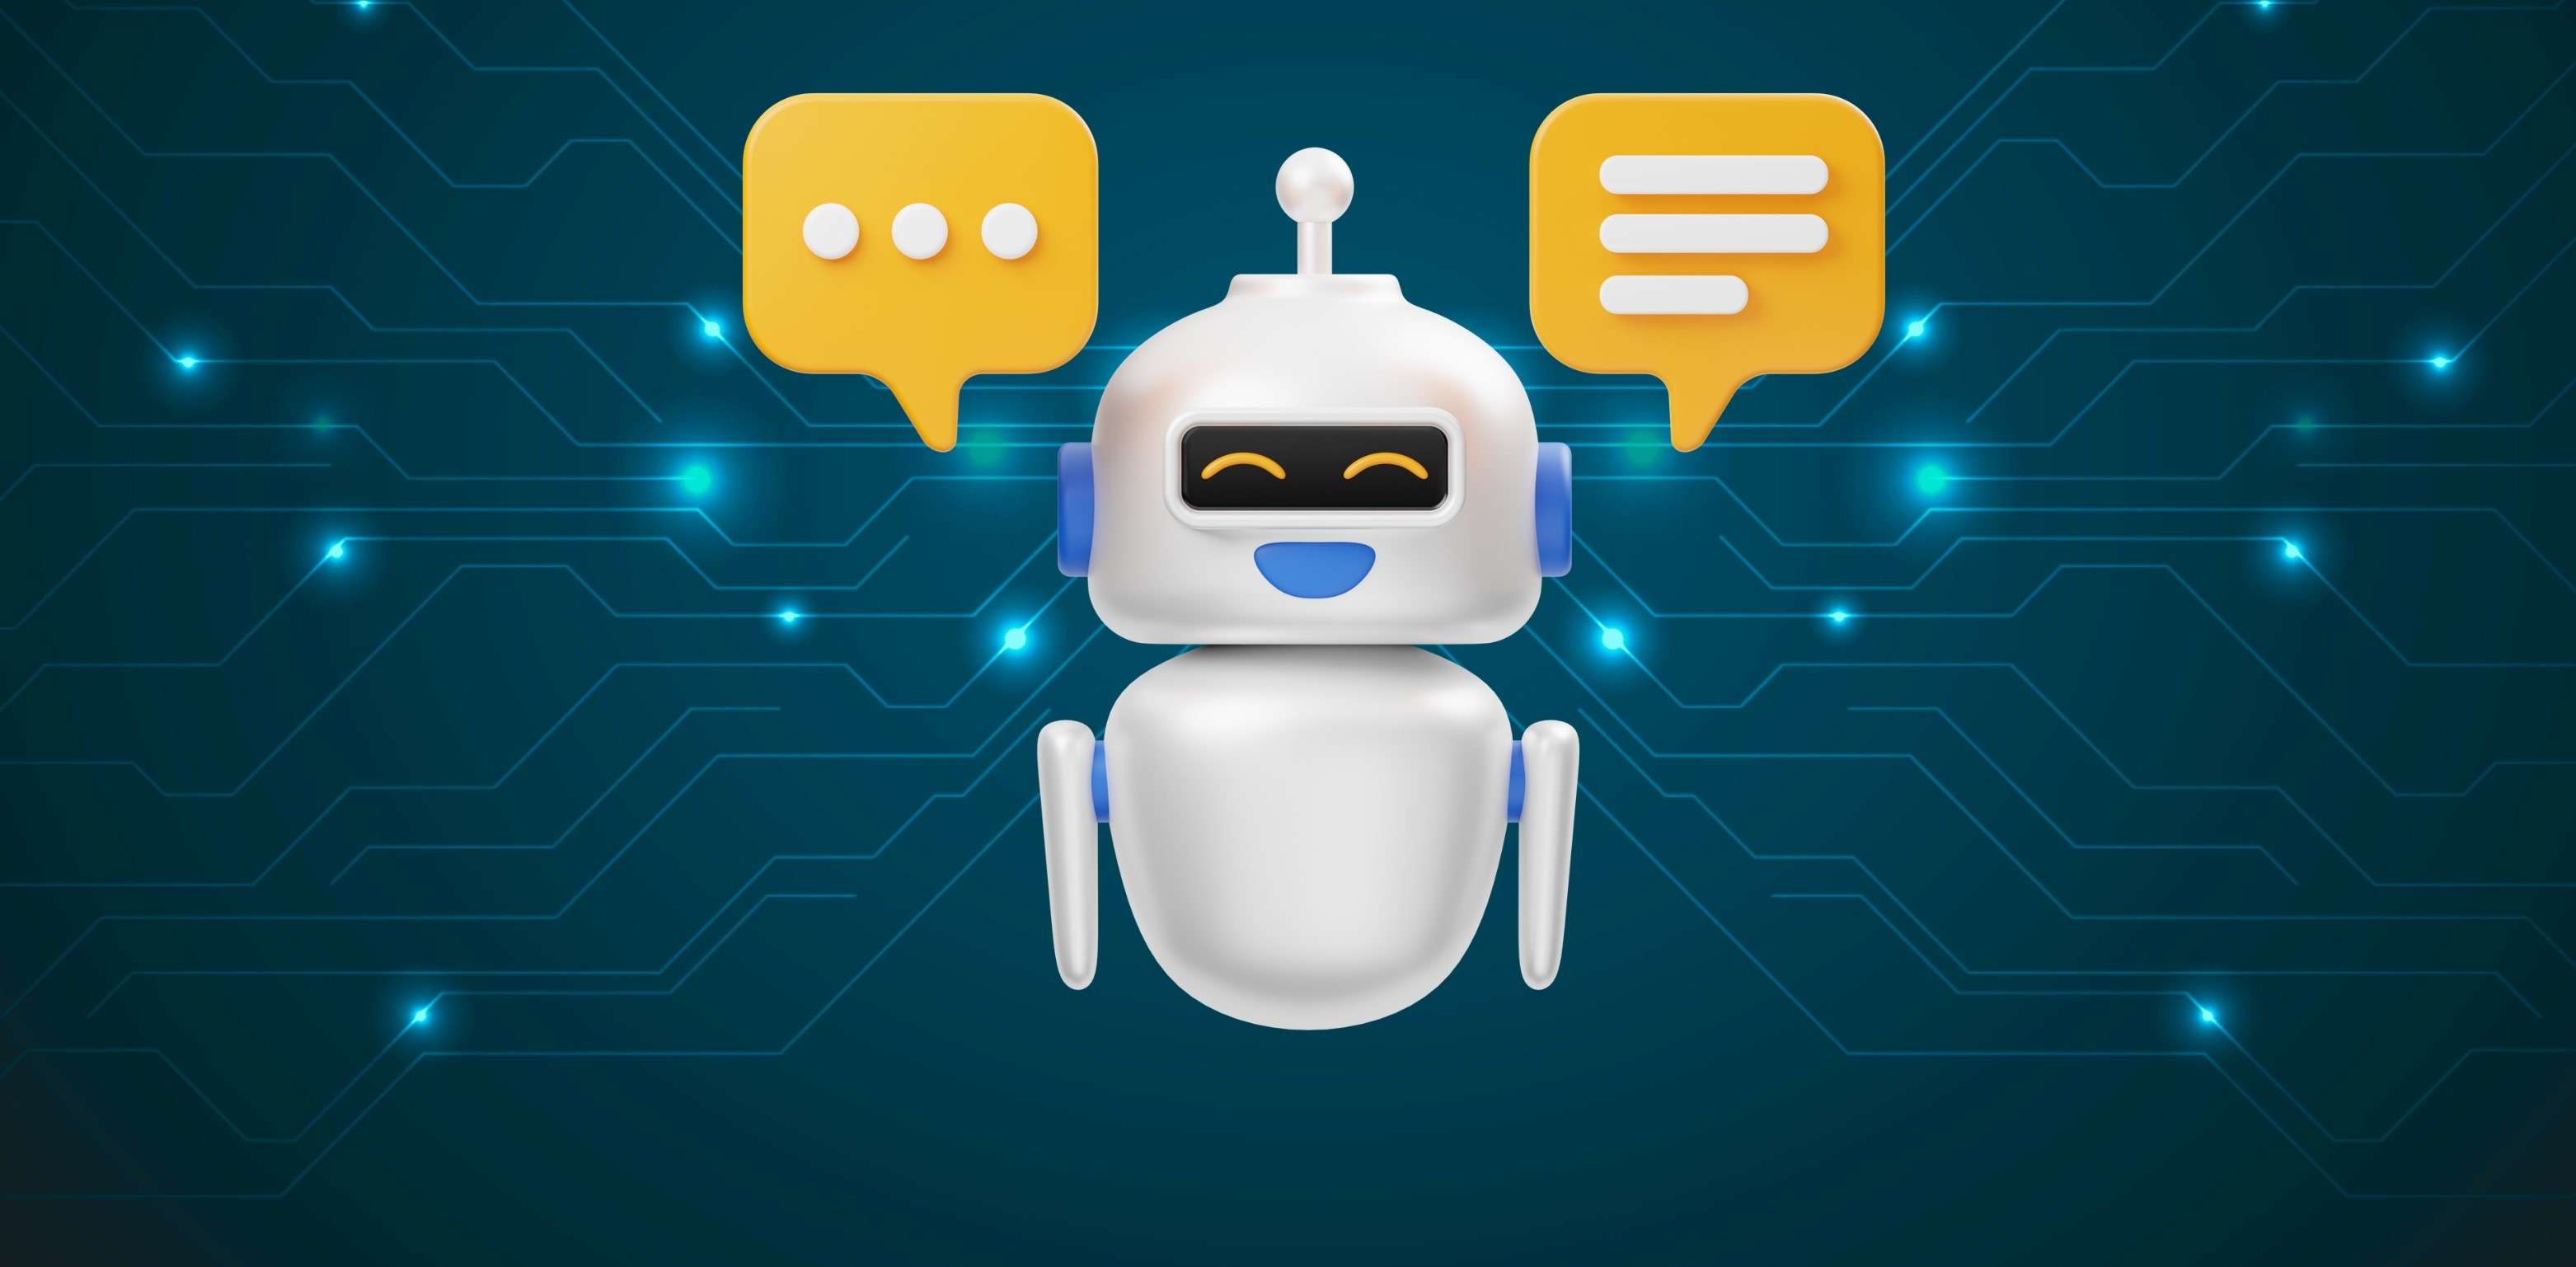

## ___Natural Language Processing (NLP) :___

 - _The first step is to process the sample input context of the users using NLP techniques._

#### ___Load dataset :___

- _Here, the dataset is made custom, which contains the intent behind user messages._

In [1]:
#Importing Dependencies
import json
import pandas as pd

In [2]:
#Loading json file(intents) from directory
with open("intents.json", "r", encoding="utf-8") as file:
    intents= json.load(file)
print(intents)

{'intents': [{'tag': 'Greetings', 'requests': ['Hi', 'Hello!', 'Hey', 'Namaste', 'Good morning', 'Good afternoon', 'Good evening', "What's up?", 'Hi there', 'Greetings', 'Howdy!', 'Yo! ', "What's going on?", 'Is anyone there?', 'Hi, I need assistance with my order.', 'Namaste, can you help me with something?'], 'responses': ["👋 Hello there! It's always a pleasure to welcome you. What can I assist you with today?", '😊 Hey! Great to have you here. What brings you to me today? How can I be of service?', "👋 Hi! It's wonderful to see you. How may I assist you today? I'm here to help!", "😊 Well, hello! I'm glad you stopped by. What can I do for you today? Feel free to ask anything.", '👋 Hey, good to have you back! How can I lend a hand today? Let me know what you need.', "👋 Greetings! It's fantastic to see you again. How can I be of assistance today? Just let me know!", "😊 Hello there! It's always a pleasure to have you visit. How can I assist you today? Let's tackle it together.", "👋 Hi! It

In [3]:
#Lists for storing tag and requests
tag=[]
requests=[]
#--------------------------------------------------------------
for dic in intents['intents']:
   for key,value in dic.items():
      if key=="tag":
         for iteration in range(len(dic["requests"])):
            tag.append(value)
      if key=="requests":
         for request in value:
            requests.append(request)
#-------------------------------------------------------------------
#Creating a dataframe
df=pd.DataFrame({"tag":tag,"requests":requests})      
df.sample(5)

,tag,requests
639,Order_Without_Quantity,Can I have Bread Omelettes and Onion Samosas?
674,Order_Without_Quantity,Could you please get me Chicken Puffs and just...
219,About_Me,creator of your essence?
780,Order_Confirmation_yes,"Ok, I'll confirm the order as requested."
481,Ordering_Intent_With_Quantity,I'll take 5 Chicken Rolls and 2 Bajjis.


#### _**Text Preprocessing :**_

In [4]:
#Importing Dependencies
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
#---------------------------------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [6]:
def preprocess_text(text):
    sentences = sent_tokenize(text)
    filtered_tokens = []
    for sentence in sentences:
        tokens = word_tokenize(sentence.lower())
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalnum()]
        filtered_tokens.extend(lemmatized_tokens)
    preprocessed_text = " ".join(filtered_tokens)
    return preprocessed_text

df["processed_requests"]=df["requests"].apply(lambda x: preprocess_text(x))
df.sample(5)

,tag,requests,processed_requests
366,About_Me,generator of your source?,generator source
171,Well_Being_Enquiry,Are you feeling motivated?,feeling motivated
954,Not_Available,I could really go for some Pav Bhaji today.,could really go pav bhaji today
633,Order_Without_Quantity,Could you add Sambar Vadas and Veg Roll to my ...,could add sambar vadas veg roll order
294,About_Me,generator of your design?,generator design


In [7]:
df["tag"].value_counts()

tag
Order_Without_Quantity           214
About_Me                         193
Ordering_Intent_With_Quantity    189
Not_Available                    152
Well_Being_Enquiry               113
Final_Words                      100
Order_Confirmation_yes            48
Snacks_Recommendations            45
Order_Confirmation_no             33
Greetings                         16
Name: count, dtype: int64

In [8]:
#Checking for duplictes:
df.duplicated().sum()

311

In [9]:
#Dropping the duplicates
df.drop_duplicates(inplace=True)

## ___Deep Learning :___

- _Here the target is to predict "tag" with the help of feature variable "processed_requests"_

#### _**Label Encoding and Text Representation :**_

In [ ]:
#Importing Dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import  Dense,Dropout
from keras.callbacks import EarlyStopping

In [11]:
#Splitting the Feature (X) and Target(y) variables
X=df["processed_requests"]
y=df["tag"]
#------------------------------------------------------
print("Shape of X :",X.shape)
print("Shape of y :",y.shape)

Shape of X : (792,)
Shape of y : (792,)


In [12]:
#Using TF-IDF Vectorizer for "processed_requests"
tfidf_vectorizer = TfidfVectorizer()
X_vector= tfidf_vectorizer.fit_transform(X)
#-----------------------------------------------------
# bow_vectorizer = CountVectorizer()
# X_vector= bow_vectorizer.fit_transform(X)
#-----------------------------------------------------
#Manually fixing the labels
labels={
        'Greetings': 0,
        'Well_Being_Enquiry': 1,
        'About_Me':2,
        'Snacks_Recommendations': 3,
        'Order_Confirmation_no': 4,
        'Order_Confirmation_yes': 5,
        'Ordering_Intent_With_Quantity': 6,
        'Order_Without_Quantity':7,
        'Final_Words': 8,
        'Not_Available':9
        }
y_encoded=df["tag"].replace(labels)

In [13]:
print("Shape of X_VECTOR:",X_vector.shape)
print("Target Lables",y_encoded.shape)

Shape of X_VECTOR: (792, 549)
Target Lables (792,)


In [14]:
# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_encoded, test_size=0.2, random_state=42)
# Convert sparse matrix to numpy array
X_train = X_train.toarray()
X_test = X_test.toarray()
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (633, 549)
Shape of X_test: (159, 549)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [16]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#--------------------------------------------------------------------------------------------------
#Early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#--------------------------------------------------------------------------------------------------
#Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1,callbacks=[early_stopping])


Epoch 1/50


9/9 [==============================] - 2s 36ms/step - loss: 2.2789 - accuracy: 0.2091 - val_loss: 2.2594 - val_accuracy: 0.2188
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 2.2135 - accuracy: 0.3251 - val_loss: 2.2022 - val_accuracy: 0.3125
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 2.1319 - accuracy: 0.3989 - val_loss: 2.1222 - val_accuracy: 0.3281
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 2.0203 - accuracy: 0.4569 - val_loss: 2.0125 - val_accuracy: 0.3750
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 1.8716 - accuracy: 0.5062 - val_loss: 1.8696 - val_accuracy: 0.4531
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 1.6928 - accuracy: 0.6151 - val_loss: 1.6805 - val_accuracy: 0.5938
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 1.4727 - accuracy: 0.6766 - val_loss: 1.4578 - val_accuracy: 0.5938
Epoch 8/50
9/9 [==============

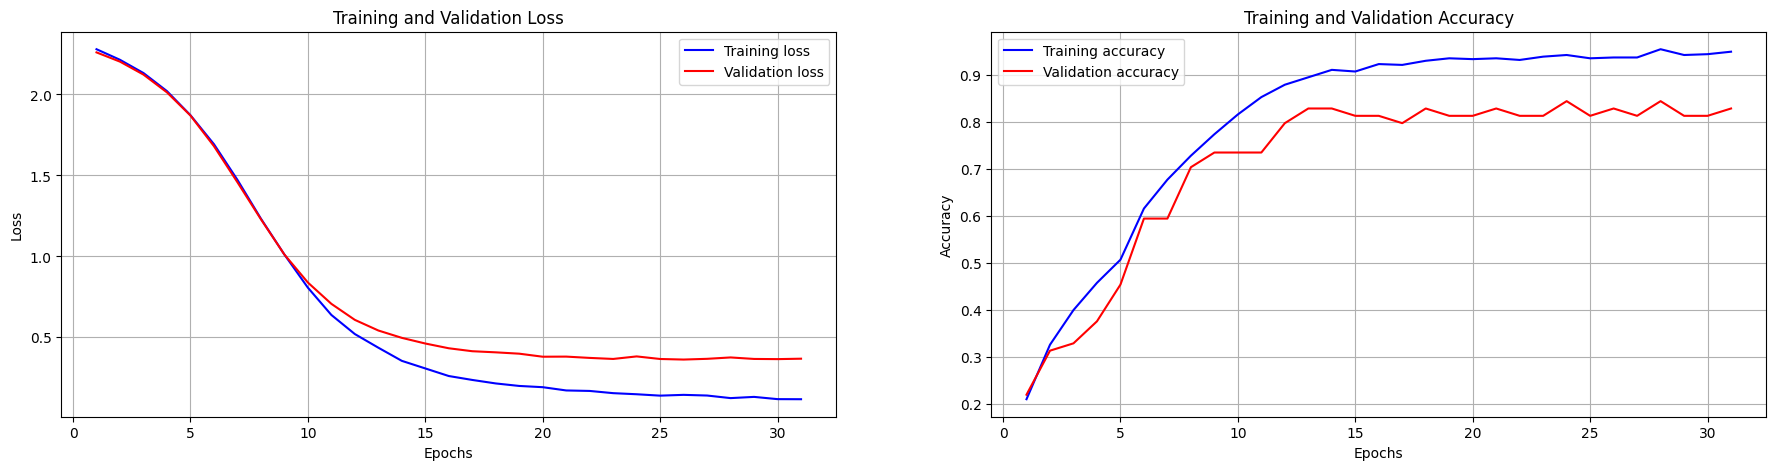

In [17]:
import matplotlib.pyplot as plt
#-------------------------------------------------------------------
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
#---------------------------------------------------------------------
plt.figure(figsize=(22, 5))
#---------------------------------------------------------------------
# loss
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
#-------------------------------------------------------------------------
#Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

5/5 [==============================] - 0s 4ms/step - loss: 0.4308 - accuracy: 0.8050
Test Loss: 0.4307926595211029, Test Accuracy: 0.805031418800354


#### _***Saving the trained model***_:

In [ ]:
#DL model
model.save("dl_model.h5")
#----------------------------------------------
#tf-idf model
import pickle
with open('tfidf_model.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model("dl_model.h5")

## _**Model Prediction:**_

#### _***Building Chatbot :***_

In [19]:
#Importing Dependencies
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime
import spacy

In [20]:
#Function for recognizing the Labels.It utilizizes custom trained spacy model.
def order(text):
    #---------------------------------------------------------------------------------------------------------------
    ordered_snacks_list = []
    ordered_snack_quantity_list = []
    #---------------------------------------------------------------------------------------------------------------
    #Loading the custom model
    custom_ner_model=spacy.load("custom_ner_model_2")
    #---------------------------------------------------------------------------------------------------------------
    text=text.lower()
    doc = custom_ner_model(text)
    #---------------------------------------------------------------------------------------------------------------
    for ent in doc.ents:
        if ent.label_ == "SNACKS":
            ordered_snacks_list.append(ent.text)
        if ent.label_ == "NUMBERS":
            ordered_snack_quantity_list.append(ent.text)
            print(ent.label_, "--", ent.text)
    return ordered_snacks_list ,ordered_snack_quantity_list

In [113]:
#List for storing orders
order_list=[]
if 
#-------------------------------------------------------------------------------------------
#Function for text input andd to return output
def input_chat(input_text):
              input_text=input_text.lower()
              #------------------------------------------------------------------------------
              #Text Preprocessing
              processed_chat=preprocess_text(input_text)
              #Converting to vector
              processed_chat_vector=tfidf_vectorizer.transform([processed_chat])
              #------------------------------------------------------------------------------
              #Prediction
              predicted_probability=model.predict(processed_chat_vector.toarray())
              #------------------------------------------------------------------------------
              output_label_data={
                            0: 'Greetings',
                            1: 'Well_Being_Enquiry',
                            2: 'About_Me',
                            3: 'Snacks_Recommendations',
                            4: 'Order_Confirmation_no',
                            5: 'Order_Confirmation_yes',
                            6: 'Ordering_Intent_With_Quantity',
                            7: 'Order_Without_Quantity',
                            8: 'Final_Words',
                            9: "Not_Available"
                            }
              #------------------------------------------------------------------------------
              predicted_tag=output_label_data[predicted_probability.argmax()]
              print(predicted_probability)
              print("Predicted tag :",predicted_tag)
              #-----------------------------------------------------------------------------
              #Response
              for dic in intents["intents"]:
                       if dic["tag"]==predicted_tag:
                            output_response=np.random.choice(dic["responses"])
                            if predicted_tag=="Snacks_Recommendations":
                                   menu_image=Image.open("menu.jpg")
                                   display(menu_image)
                                   return output_response
                            if predicted_tag=="Not_Available":
                                   menu_image=Image.open("menu.jpg")
                                   display(menu_image)
                                   return output_response
                            if predicted_tag=="Ordering_Intent_With_Quantity":
                                   #----------------------------------------------------------------------------- 
                                   ordered_snacks_list ,ordered_snack_quantity_list=order(input_text)
                                   #-----------------------------------------------------------------------------
                                   order_list.append(input_text)
                                   #-----------------------------------------------------------------------------
                                   total_price=[]  
                                   #----------------------------------------------------------------------------- 
                                   for snack,quantity in zip(ordered_snacks_list ,ordered_snack_quantity_list):
                                       price_list =    {
                                                        "bajji": 8,
                                                        "bajjis": 8,
                                                        "bread omelette": 55,
                                                        "bread omelettes": 55,
                                                        "chicken puff": 25,
                                                        "chicken puffs": 25,
                                                        "chicken roll": 30,
                                                        "chicken rolls": 30,
                                                        "curd vada": 25,
                                                        "curd vadas": 25,
                                                        "egg puff": 20,
                                                        "egg puffs": 20,
                                                        "gobi chilli": 45,
                                                        "gobi chillis": 45,
                                                        "masala bonda": 12,
                                                        "masala bondas": 12,
                                                        "masala vada": 8,
                                                        "masala vadas": 8,
                                                        "mushroom chilli": 60,
                                                        "mushroom chillis": 60,
                                                        "onion bonda": 8,
                                                        "onion bondas": 8,
                                                        "onion samosa": 10,
                                                        "onion samosas": 10,
                                                        "potato samosa": 10,
                                                        "potato samosas": 10,
                                                        "rusk": 7,
                                                        "rusks": 7,
                                                        "salt biscuit": 6,
                                                        "salt biscuits": 6,
                                                        "sambar vada": 25,
                                                        "sambar vadas": 25,
                                                        "veg puff": 15,
                                                        "veg puffs": 15,
                                                        "veg roll": 23,
                                                        "veg rolls": 23
                                                       }
                                       word_to_digit_mapping = {
                                                        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 
                                                        'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18,
                                                        'nineteen': 19, 'twenty': 20, 'twenty one': 21, 'twenty two': 22, 'twenty three': 23, 'twenty four': 24, 'twenty five': 25, 
                                                        'twenty six': 26, 'twenty seven': 27, 'twenty eight': 28, 'twenty nine': 29, 'thirty': 30, 'thirty one': 31, 'thirty two': 32, 'thirty three': 33, 'thirty four': 34, 'thirty five': 35, 'thirty six': 36, 'thirty seven': 37, 'thirty eight': 38, 'thirty nine': 39, 'forty': 40, 'forty one': 41, 'forty two': 42, 'forty three': 43, 'forty four': 44, 'forty five': 45, 'forty six': 46, 'forty seven': 47, 'forty eight': 48, 'forty nine': 49, 'fifty': 50, 'fifty one': 51, 'fifty two': 52, 'fifty three': 53, 'fifty four': 54, 'fifty five': 55, 'fifty six': 56, 'fifty seven': 57, 'fifty eight': 58, 'fifty nine': 59, 'sixty': 60,
                                                        'sixty one': 61, 'sixty two': 62, 'sixty three': 63, 'sixty four': 64, 'sixty five': 65, 'sixty six': 66, 'sixty seven': 67, 'sixty eight': 68, 'sixty nine': 69, 'seventy': 70, 'seventy one': 71, 'seventy two': 72, 'seventy three': 73, 'seventy four': 74, 
                                                        'seventy five': 75, 'seventy six': 76, 'seventy seven': 77, 'seventy eight': 78, 'seventy nine': 79, 'eighty': 80, 'eighty one': 81, 'eighty two': 82, 'eighty three': 83, 'eighty four': 84, 'eighty five': 85, 'eighty six': 86, 'eighty seven': 87, 'eighty eight': 88, 'eighty nine': 89, 'ninety': 90, 'ninety one': 91, 'ninety two': 92, 'ninety three': 93, 'ninety four': 94, 'ninety five': 95, 'ninety six': 96, 'ninety seven': 97, 'ninety eight': 98, 'ninety nine': 99, 'one hundred': 100
                                                        }
                                       if quantity.isdigit():                                                   
                                           total_price.append( price_list[snack]*int(quantity)) 
                                       else:                                                   
                                          total_price.append(price_list[snack]*word_to_digit_mapping[quantity])
                                   #-----------------------------------------------------------------------
                                   bill_df=pd.DataFrame({"SI":[i for i in range(1,len(ordered_snacks_list)+1)],"Snacks":ordered_snacks_list,"Price (₹)":[price_list[snack]for snack in (ordered_snacks_list) ],"Quantity":[int(word_to_digit_mapping[i]) if i in word_to_digit_mapping else i for i in ordered_snack_quantity_list],"Total Price (₹)":total_price},index=None) 
                                   #-----------------------------------------------------------------------
                                   total_bill=bill_df["Total Price (₹)"].sum()
                                   #--------------------------------------------------------------------------------
                                   plt.figure(figsize=(3,3))
                                   plt.axis('off')
                                   table=plt.table(cellText=bill_df.values,colLabels=bill_df.columns,cellLoc='left',loc='left',fontsize=10,colWidths=[0.5, 0.5, 0.5, 0.5, 0.5])
                                   plt.text(-3, 1, "*********************************************** Your Order Wishlist  ***********************************************", ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   plt.text(-3, 0.1, f'--- Net Amount : ₹ {float(total_bill)}', ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   table.auto_set_font_size(False)                       
                                   table.set_fontsize(10)
                                   plt.gcf().set_facecolor('#e6edf7')
                                   plt.savefig('wish_image.png')
                                                         
                                   return "Would you like to confirm your order ?"
                            if predicted_tag=="Order_Confirmation_yes":
                               if len(order_list)>=1: 
                                   ordered_snacks_list ,ordered_snack_quantity_list=order(order_list[-1])
                                   total_price=[]   
                                   for snack,quantity in zip(ordered_snacks_list ,ordered_snack_quantity_list):
                                       price_list =    {
                                                        "bajji": 8,
                                                        "bajjis": 8,
                                                        "bread omelette": 55,
                                                        "bread omelettes": 55,
                                                        "chicken puff": 25,
                                                        "chicken puffs": 25,
                                                        "chicken roll": 30,
                                                        "chicken rolls": 30,
                                                        "curd vada": 25,
                                                        "curd vadas": 25,
                                                        "egg puff": 20,
                                                        "egg puffs": 20,
                                                        "gobi chilli": 45,
                                                        "gobi chillis": 45,
                                                        "masala bonda": 12,
                                                        "masala bondas": 12,
                                                        "masala vada": 8,
                                                        "masala vadas": 8,
                                                        "mushroom chilli": 60,
                                                        "mushroom chillis": 60,
                                                        "onion bonda": 8,
                                                        "onion bondas": 8,
                                                        "onion samosa": 10,
                                                        "onion samosas": 10,
                                                        "potato samosa": 10,
                                                        "potato samosas": 10,
                                                        "rusk": 7,
                                                        "rusks": 7,
                                                        "salt biscuit": 6,
                                                        "salt biscuits": 6,
                                                        "sambar vada": 25,
                                                        "sambar vadas": 25,
                                                        "veg puff": 15,
                                                        "veg puffs": 15,
                                                        "veg roll": 23,
                                                        "veg rolls": 23
                                                       }
                                       word_to_digit_mapping = {
                                                        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 
                                                        'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18,
                                                        'nineteen': 19, 'twenty': 20, 'twenty one': 21, 'twenty two': 22, 'twenty three': 23, 'twenty four': 24, 'twenty five': 25, 
                                                        'twenty six': 26, 'twenty seven': 27, 'twenty eight': 28, 'twenty nine': 29, 'thirty': 30, 'thirty one': 31, 'thirty two': 32, 'thirty three': 33, 'thirty four': 34, 'thirty five': 35, 'thirty six': 36, 'thirty seven': 37, 'thirty eight': 38, 'thirty nine': 39, 'forty': 40, 'forty one': 41, 'forty two': 42, 'forty three': 43, 'forty four': 44, 'forty five': 45, 'forty six': 46, 'forty seven': 47, 'forty eight': 48, 'forty nine': 49, 'fifty': 50, 'fifty one': 51, 'fifty two': 52, 'fifty three': 53, 'fifty four': 54, 'fifty five': 55, 'fifty six': 56, 'fifty seven': 57, 'fifty eight': 58, 'fifty nine': 59, 'sixty': 60,
                                                        'sixty one': 61, 'sixty two': 62, 'sixty three': 63, 'sixty four': 64, 'sixty five': 65, 'sixty six': 66, 'sixty seven': 67, 'sixty eight': 68, 'sixty nine': 69, 'seventy': 70, 'seventy one': 71, 'seventy two': 72, 'seventy three': 73, 'seventy four': 74, 
                                                        'seventy five': 75, 'seventy six': 76, 'seventy seven': 77, 'seventy eight': 78, 'seventy nine': 79, 'eighty': 80, 'eighty one': 81, 'eighty two': 82, 'eighty three': 83, 'eighty four': 84, 'eighty five': 85, 'eighty six': 86, 'eighty seven': 87, 'eighty eight': 88, 'eighty nine': 89, 'ninety': 90, 'ninety one': 91, 'ninety two': 92, 'ninety three': 93, 'ninety four': 94, 'ninety five': 95, 'ninety six': 96, 'ninety seven': 97, 'ninety eight': 98, 'ninety nine': 99, 'one hundred': 100
                                                        }
                                       if quantity.isdigit():                                                   
                                           total_price.append( price_list[snack]*int(quantity)) 
                                       else:                                                   
                                          total_price.append(price_list[snack]*word_to_digit_mapping[quantity])
                                   #-----------------------------------------------------------------------
                                   bill_df=pd.DataFrame({"SI":[i for i in range(1,len(ordered_snacks_list)+1)],"Snacks":ordered_snacks_list,"Price (₹)":[price_list[snack]for snack in (ordered_snacks_list) ],"Quantity":[int(word_to_digit_mapping[i]) if i in word_to_digit_mapping else i for i in ordered_snack_quantity_list],"Total Price (₹)":total_price},index=None) 
                                   #-----------------------------------------------------------------------
                                   total_bill=bill_df["Total Price (₹)"].sum()
                                   #-----------------------------------------------------------------------
                                   order_id=np.random.randint(1000,10000)
                                   #----------------------------------------------------------------------
                                   current_datetime =datetime.now()
                                   formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")
                                   
                                   #----------------------------------------------------------------------
                                   plt.figure(figsize=(3,3))
                                   plt.axis('off')
                                   table=plt.table(cellText=bill_df.values,colLabels=bill_df.columns,cellLoc='left',loc='left',fontsize=10,colWidths=[0.5, 0.5, 0.5, 0.5, 0.5])
                                   plt.text(-3, 1, "*********************************************** ♨️ Banu Snacks ***********************************************", ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   plt.text(-3, 0.8, f'--- Date / Time : {formatted_datetime}', ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   plt.text(-3, 0.2, f'--- Order ID:     #{order_id}', ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   plt.text(-3, 0.1, f'--- Net Amount : ₹ {float(total_bill)}', ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   plt.text(-3, -0.1, "Thanks for Ordering! Spread Positivity ❤️", ha='left', fontsize=12, transform=plt.gca().transAxes)
                                   table.auto_set_font_size(False)  
                                   table.set_fontsize(10) 
                                   plt.gcf().set_facecolor('#e6edf7')                          
                                   return "Your order is confirmed Thank you! Visit Again."
                               else:
                                  return "Kindly specify your order!"
                                   
                            else:
                                   return output_response


1/1 [==============================] - 0s 46ms/step
[[2.4335051e-03 3.5704204e-04 1.5223658e-04 2.1425325e-04 3.1936442e-04
  4.3512270e-04 6.2748629e-01 3.6702505e-01 1.3441693e-03 2.3295818e-04]]
Predicted tag : Ordering_Intent_With_Quantity
NUMBERS -- one
SNACKS -- bread omelettes
NUMBERS -- 1
SNACKS -- chicken puff
NUMBERS -- two
SNACKS -- veg rolls
Would you like to confirm your order ?


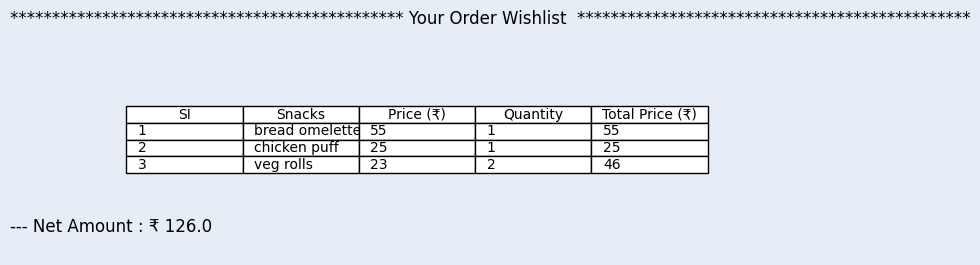

In [114]:
#User input
text_input="i want one  bread omelettes 1 chicken puff and also two veg rolls"
#----------------------------------------------------------------------------------------------
#Calling response function to get response from the chatbot
try:
    response=input_chat(text_input)
    print(response)
except Exception:
    print("Sorry! Invalid Entry \n I can't able to understand,try again!.")

In [ ]:
#Sample input Prompts
#----------------------------------------------------------------------
# Hello bot?
# How are you feeling today
# tell me who developed you
# show me what is special today
# i need banana
# ok i need  bread omelette, chicken puff
# i want one  bread omelettes 1 chicken puff and also two veg rolls
# cancel my order
# sure confirm my order
# ok thank you bye
